# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
weather_df = pd.DataFrame({"City": cities})
weather_df

,City
0,puerto ayora
1,provideniya
2,kloulklubed
3,praia da vitoria
4,atuona
...,...
614,mentok
615,solnechnyy
616,marawi
617,manzhouli


In [30]:
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,,,,,,,,
1,provideniya,,,,,,,,
2,kloulklubed,,,,,,,,
3,praia da vitoria,,,,,,,,
4,atuona,,,,,,,,


In [32]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


parameters = {"units": units,
             "appid": weather_api_key}

print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in weather_df.iterrows():
    parameters["q"] = row["City"]
    response = requests.get(url, params=parameters).json()
    
    try:        
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
        print(f"Processing Record {index} | {row['City']}")
              
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | puerto ayora
Processing Record 1 | provideniya
Processing Record 2 | kloulklubed
Processing Record 3 | praia da vitoria
Processing Record 4 | atuona
Processing Record 5 | pisco
Processing Record 6 | longyearbyen
Processing Record 7 | rikitea
Processing Record 8 | avarua
Processing Record 9 | buraydah
Processing Record 10 | bintulu
Processing Record 11 | praia
Processing Record 12 | namatanai
Processing Record 13 | camacha
Processing Record 14 | pointe michel
Processing Record 15 | ushuaia
Processing Record 16 | hermanus
Processing Record 17 | katobu
Processing Record 18 | mugur-aksy
Processing Record 19 | punta arenas
Processing Record 20 | fortuna
Processing Record 21 | new norfolk
Processing Record 22 | adrar
Processing Record 23 | lubango
Processing Record 24 | moindou
Processing Record 25 | luba
Processing Record 26 | busselton
Processing Record 27 | vila franca do campo
Processing Record 28 | rocha
Proces

Processing Record 253 | te anau
Processing Record 254 | thio
Processing Record 255 | port hardy
Processing Record 256 | anloga
Processing Record 257 | hamilton
Processing Record 258 | tabou
Processing Record 259 | itarema
Processing Record 260 | cairns
Processing Record 261 | hualmay
Processing Record 262 | georgetown
Processing Record 263 | kapit
City not found. Skipping...
Processing Record 265 | klaksvik
Processing Record 266 | leshukonskoye
Processing Record 267 | kavieng
Processing Record 268 | college
Processing Record 269 | mitsamiouli
Processing Record 270 | mariental
Processing Record 271 | algiers
Processing Record 272 | sobolevo
Processing Record 273 | high level
Processing Record 274 | iqaluit
Processing Record 275 | muncar
Processing Record 276 | miri
Processing Record 277 | lazaro cardenas
Processing Record 278 | chapais
Processing Record 279 | geraldton
Processing Record 280 | muleba
Processing Record 281 | deputatskiy
Processing Record 282 | constitucion
Processing Reco

City not found. Skipping...
Processing Record 504 | shubarkuduk
Processing Record 505 | verkhnetulomskiy
Processing Record 506 | westerland
Processing Record 507 | tricase
Processing Record 508 | kerema
City not found. Skipping...
Processing Record 510 | bethel
Processing Record 511 | launceston
Processing Record 512 | novo aripuana
Processing Record 513 | shingu
Processing Record 514 | luneburg
Processing Record 515 | pascagoula
Processing Record 516 | talnakh
City not found. Skipping...
Processing Record 518 | labuan
Processing Record 519 | jacksonville
Processing Record 520 | touros
Processing Record 521 | miandrivazo
Processing Record 522 | diego de almagro
Processing Record 523 | carson city
Processing Record 524 | calama
Processing Record 525 | verkhnyaya inta
Processing Record 526 | anadyr
Processing Record 527 | nukus
Processing Record 528 | tommot
Processing Record 529 | huanren
Processing Record 530 | kaduy
Processing Record 531 | qeshm
Processing Record 532 | goderich
Proces

In [33]:
weather_df.replace("", "NaN", inplace=True)

weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(float)
weather_df["Date"] = weather_df["Date"].astype(float)
weather_df["Humidity"] = weather_df["Humidity"].astype(float)
weather_df["Lat"] = weather_df["Lat"].astype(float)
weather_df["Lng"] = weather_df["Lng"].astype(float)
weather_df["Max Temp"] = weather_df["Max Temp"].astype(float)
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(float)

weather_df.dropna(inplace=True)

weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(int)
weather_df["Humidity"] = weather_df["Humidity"].astype(int)

weather_df.reset_index(drop=True, inplace=True)

weather_df.index.name = "City_ID"

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
weather_df.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [35]:
weather_df.to_csv("Cities.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,puerto ayora,20,EC,1.586122e+09,70,-0.74,-90.35,84.20,10.29
1,provideniya,100,RU,1.586121e+09,86,64.38,-173.30,6.84,11.63
2,kloulklubed,75,PW,1.586121e+09,88,7.04,134.26,75.20,5.82
3,praia da vitoria,75,PT,1.586122e+09,87,38.73,-27.07,55.40,14.27
4,atuona,22,PF,1.586121e+09,76,-9.80,-139.03,81.59,14.38


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [36]:
date = weather_df.loc[0, ["Date"]]
date2 = time.gmtime(date)
date3 = f"({date2[1]}/{date2[2]}/{date2[0]})"

#### Latitude vs. Temperature Plot

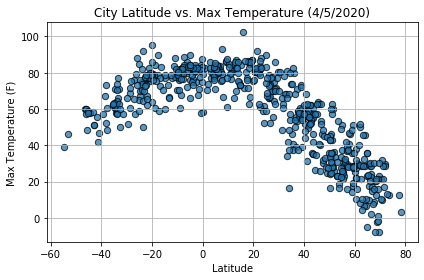

In [37]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", title = f"City Latitude vs. Max Temperature {date3}",
                edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

plt.savefig("fig1.png")

Here the maximum temperature of a city on the 5th of April 2020 is plotted against the city's latitude. The trend shows that max temperatures decrease the farther from the equator the city is.

#### Latitude vs. Humidity Plot

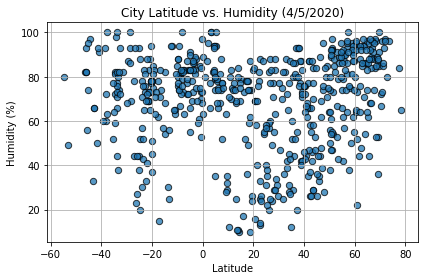

In [38]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", title=f"City Latitude vs. Humidity {date3}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

plt.savefig("fig2.png")

Here the humidity of a city on the 5th of April 2020 is plotted against the city's latitude. There doesn't seem to be a strong trend between humidity and latitude.

#### Latitude vs. Cloudiness Plot

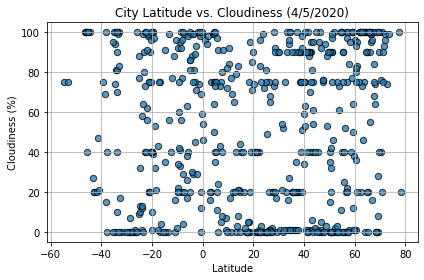

In [39]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", title=f"City Latitude vs. Cloudiness {date3}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

plt.savefig("fig3.png")

Here the cloudiness of a city on the 5th of April 2020 is plotted against the city's latitude. There seems to be horizontal lines along the easily divisible numbers weathermen like to forecast data on.

#### Latitude vs. Wind Speed Plot

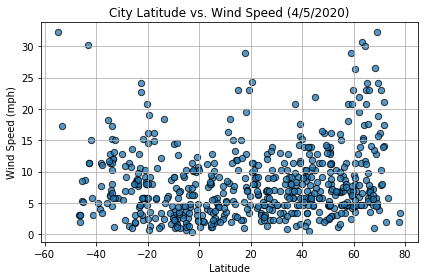

In [40]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", title=f"City Latitude vs. Wind Speed {date3}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

plt.savefig("fig4.png")

Here the wind speed of a city on the 5th of April 2020 is charted against the city's latitude. It appears that higher wind speeds occur farther from the equator.

## Linear Regression

In [41]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0,:]
Southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0,:]

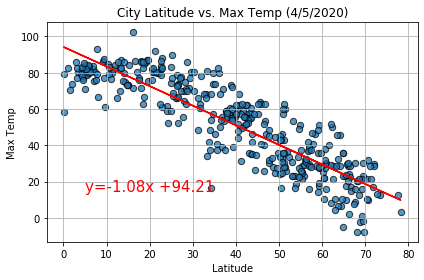

The r-squared is: 0.7796763952466605.


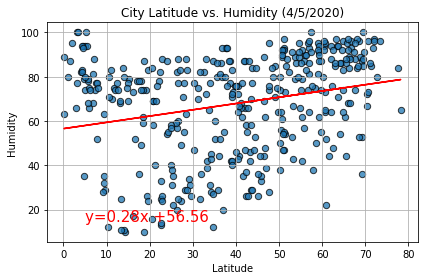

The r-squared is: 0.06358381667056942.


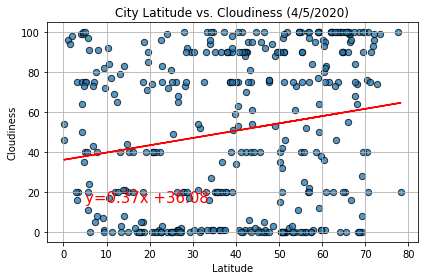

The r-squared is: 0.03671109191317001.


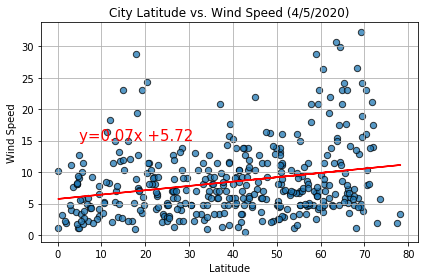

The r-squared is: 0.05925194656270382.


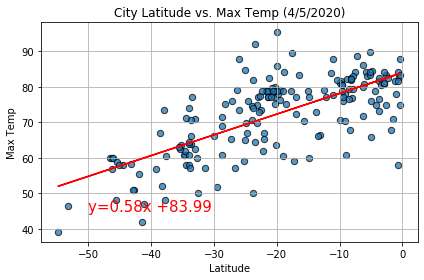

The r-squared is: 0.49784836943519134.


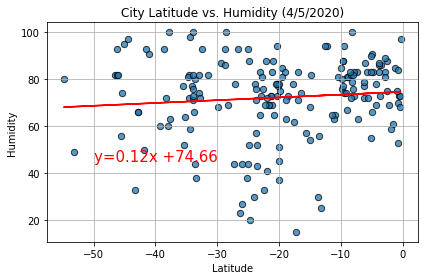

The r-squared is: 0.008324005682229312.


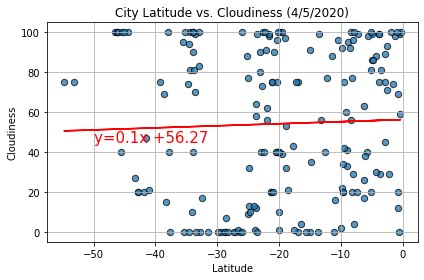

The r-squared is: 0.001333549469306185.


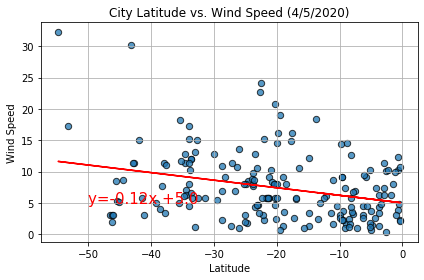

The r-squared is: 0.08898910816659722.


In [42]:
# OPTIONAL: Create a function to create Linear Regression plots
hemispheres = [Northern_hemisphere, Southern_hemisphere]

for hemisphere in hemispheres:
    conditions = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
    for condition in conditions:
        hemisphere.plot(kind="scatter", x="Lat", y=f"{condition}", title = f"City Latitude vs. {condition} {date3}",
                edgecolor="black", s=40, alpha=0.75)
        plt.xlabel("Latitude")
        plt.ylabel(f"{condition}")
        plt.grid()
        plt.tight_layout()

        (slope, intercept, rvalue, pvalue, stderr) = linregress(hemisphere["Lat"], hemisphere[f"{condition}"])
        regress_values = hemisphere["Lat"]*slope + intercept
        line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
        plt.plot(hemisphere["Lat"], regress_values, "r-")
        if hemisphere.iloc[0,0] == Northern_hemisphere.iloc[0,0]:
            plt.annotate(line_eq, (5,15), fontsize=15, color="red")
        elif (hemisphere.iloc[0,0] == Southern_hemisphere.iloc[0,0]) & (condition != "Wind Speed"):
            plt.annotate(line_eq, (-50,45), fontsize=15, color="red")
        else:
            plt.annotate(line_eq, (-50,5), fontsize=15, color="red")
            
        plt.show()
        
        print(f"The r-squared is: {rvalue**2}.")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

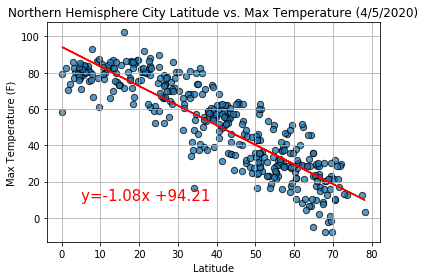

The r-squared is: 0.7796763952466605.


In [43]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Max Temp",
                         title = f"Northern Hemisphere City Latitude vs. Max Temperature {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Max Temp"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5,10), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their maximum temperatures on April 5th 2020 charted against their latitude. The trend shows that the farther from the equator a city is the lower its maximum temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

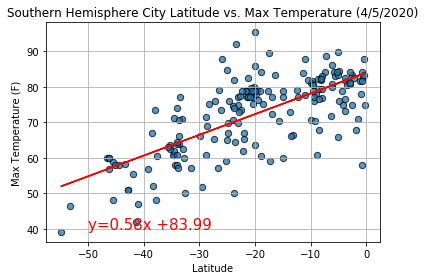

The r-squared is: 0.49784836943519134.


In [44]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Max Temp",
                         title = f"Southern Hemisphere City Latitude vs. Max Temperature {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Max Temp"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50,40), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their maximum temperature on April 5th 2020 charted against their latitude. The trend shows higher maximum temperatures closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

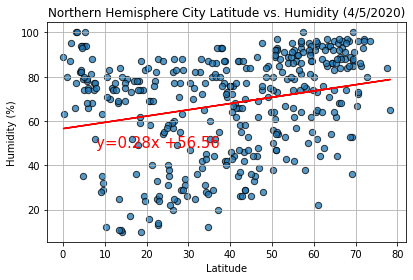

The r-squared is: 0.06358381667056942.


In [45]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Humidity",
                         title = f"Northern Hemisphere City Latitude vs. Humidity {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Humidity"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (8,48), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their humidity on April 5th 2020 charted against their latitude. There doesn't seem to be a strong trend between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

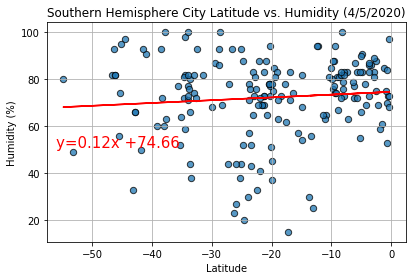

The r-squared is: 0.008324005682229312.


In [46]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Humidity",
                         title = f"Southern Hemisphere City Latitude vs. Humidity {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Humidity"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-56,51), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their humidity on April 5th 2020 charted against their latitude. There doesn't seem to be a strong trend between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

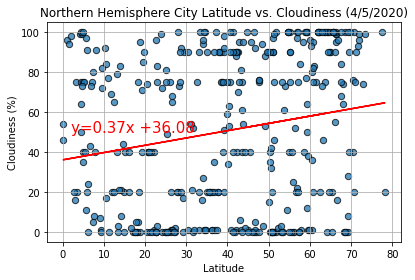

The r-squared is: 0.03671109191317001.


In [47]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Cloudiness",
                         title = f"Northern Hemisphere City Latitude vs. Cloudiness {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Cloudiness"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (2,50), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their cloud coverage on April 5th 2020 plotted against their latitude. There seems to be horizontal groupings of data along easily chosen estimates for cloud coverage.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

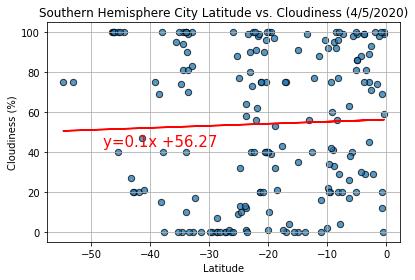

The r-squared is: 0.001333549469306185.


In [52]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Cloudiness",
                         title = f"Southern Hemisphere City Latitude vs. Cloudiness {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Cloudiness"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-48,43), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their cloud coverage on April 5th 2020 plotted against their latitude. There doesn't seem to be a strong correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

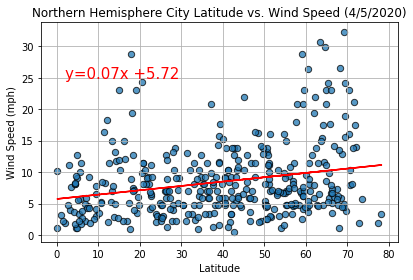

The r-squared is: 0.05925194656270382.


In [53]:
Northern_hemisphere.plot(kind="scatter", x="Lat", y="Wind Speed",
                         title = f"Northern Hemisphere City Latitude vs. Wind Speed {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_hemisphere["Lat"], Northern_hemisphere["Wind Speed"])
regress_values = Northern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Northern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (2,25), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the northern hemisphere have their wind speed on April 5th 2020 charted against their latitude. There seems to be higher wind speeds farther from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

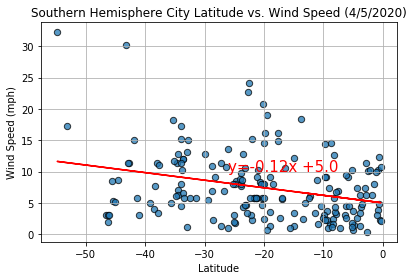

The r-squared is: 0.08898910816659722.


In [54]:
Southern_hemisphere.plot(kind="scatter", x="Lat", y="Wind Speed",
                         title = f"Southern Hemisphere City Latitude vs. Wind Speed {date3}",
                            edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_hemisphere["Lat"], Southern_hemisphere["Wind Speed"])
regress_values = Southern_hemisphere["Lat"]*slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(Southern_hemisphere["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-26,10), fontsize=15, color="red")

plt.show()

print(f"The r-squared is: {rvalue**2}.")

Here cities in the southern hemisphere have their wind speed on April 5th 2020 plotted against their latitude. There seems to be higher wind speeds farther from the equator.